# 230208 머신러닝

In [60]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from eval_score_function import eval_score


In [3]:
import matplotlib as mpl
mpl.rc('axes', unicode_minus=False)

In [4]:
diabete = load_diabetes()

In [5]:
diabete.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [6]:
pd.options.display.float_format = '{:.3f}'.format
np.set_printoptions(precision=2, suppress=True)

In [7]:
diabete.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [8]:
X = diabete.data
y = diabete.target

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=27)

In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

reg = lr.fit(X_train, y_train)

In [11]:
# 회귀계수, 절편 확인
# _ 들어간 것은 클래스 인스턴스 
reg.coef_

array([  42.13, -256.72,  585.67,  300.38, -870.33,  492.32,  184.86,
        262.17,  772.19,   54.45])

In [12]:
reg.intercept_

150.8602523396147

In [13]:
coef = reg.coef_

In [14]:
intercept = reg.intercept_

In [15]:
y_pred = reg.predict(X_test)
eval_score(y_test, y_pred)


mse = 2712.489
rmse = 52.082
r2 = 0.395


(2712.489402668732, 52.08156490226395, 0.3953449548693435)

In [16]:
# 각각의 독립변수의 설명력 확인
coef = pd.Series(coef, index=diabete.feature_names)
coef

age     42.133
sex   -256.724
bmi    585.668
bp     300.379
s1    -870.333
s2     492.321
s3     184.859
s4     262.172
s5     772.186
s6      54.447
dtype: float64

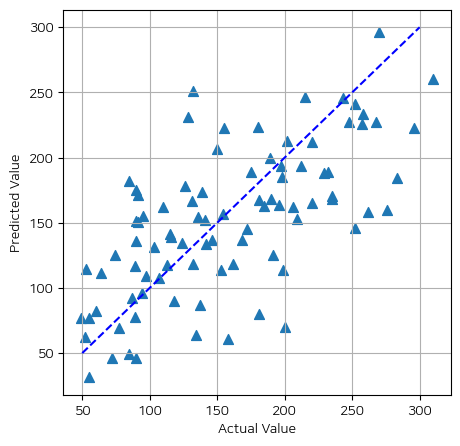

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, s=50, marker='^') #다중선형회귀에서는 전부 뿌려줄 수 없으니 예측값과 실제값의 관계를 볼 것임
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.plot([50,300],[50,300], ls='--', c ='b')
plt.grid()


In [18]:
diab_df= pd.DataFrame(diabete.data, columns=diabete.feature_names)
corr_df = diab_df.corr()
# 0.4~ 0.6은 상관이 있다고 볼 수 있다 


<AxesSubplot: >

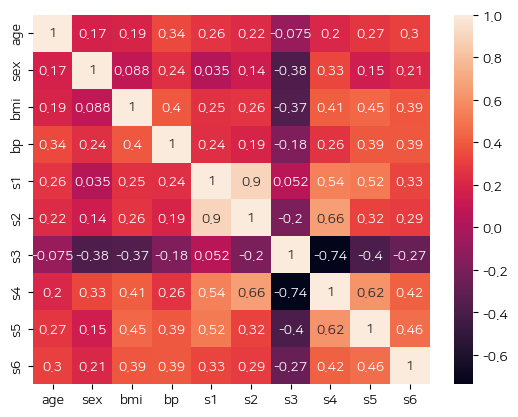

In [19]:
#씨본은 데이터 프레임과 관련 깊음 
sns.heatmap(corr_df, annot=True)

In [20]:
# 위 히트맵을 통해 s1,s2 그리고 s3, s4가 깊은 상관관계를 보이는 것을 알 수 있다 
# 무조건 버리는 건 아님. 

In [21]:
# 캘리포니아 주택 가격 
import os 
os.getcwd()

'/Users/minholee/playdata/machinelearning'

<img src="data/img/image.png" width="450" height='450'/>

```html
<img src="data/img/image.png" width="450" height='450'/>
```
이 표기를 통해 이미지를 불러올 수 있다.

In [22]:
# from sklearn.datasets
from sklearn import datasets

dir(datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__getattr__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_arff_parser',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'data',
 'descr',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerb

In [23]:
# fetch: 메모리에 올리지 않고 인터넷에 있는 데이터를 가져오겠다 하는 녀석들임 
# 즉 fetch 하는 애들은 인터넷에 연결되어 있을 때만 사용

In [24]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

In [25]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [26]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [27]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [28]:
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)

In [29]:
#pandas df이 보기 진짜 편함 
#housing_df 에 타겟 열을 추가하고 데이터를 입력하시오 

In [30]:
housing_df["Price"] = housing.target

In [31]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.325,41.000,6.984,1.024,322.000,2.556,37.880,-122.230,4.526
1,8.301,21.000,6.238,0.972,2401.000,2.110,37.860,-122.220,3.585
2,7.257,52.000,8.288,1.073,496.000,2.802,37.850,-122.240,3.521
3,5.643,52.000,5.817,1.073,558.000,2.548,37.850,-122.250,3.413
4,3.846,52.000,6.282,1.081,565.000,2.181,37.850,-122.250,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.560,25.000,5.045,1.133,845.000,2.561,39.480,-121.090,0.781
20636,2.557,18.000,6.114,1.316,356.000,3.123,39.490,-121.210,0.771
20637,1.700,17.000,5.206,1.120,1007.000,2.326,39.430,-121.220,0.923
20638,1.867,18.000,5.330,1.172,741.000,2.123,39.430,-121.320,0.847


In [32]:
# 기초통계량 보기 
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000,20640.000,20640.000,20640.000,20640.000,20640.000,20640.000,20640.000,20640.000
mean,3.871,28.639,5.429,1.097,1425.477,3.071,35.632,-119.570,2.069
std,1.900,12.586,2.474,0.474,1132.462,10.386,2.136,2.004,1.154
min,0.500,1.000,0.846,0.333,3.000,0.692,32.540,-124.350,0.150
25%,2.563,18.000,4.441,1.006,787.000,2.430,33.930,-121.800,1.196
50%,3.535,29.000,5.229,1.049,1166.000,2.818,34.260,-118.490,1.797
75%,4.743,37.000,6.052,1.100,1725.000,3.282,37.710,-118.010,2.647
max,15.000,52.000,141.909,34.067,35682.000,1243.333,41.950,-114.310,5.000


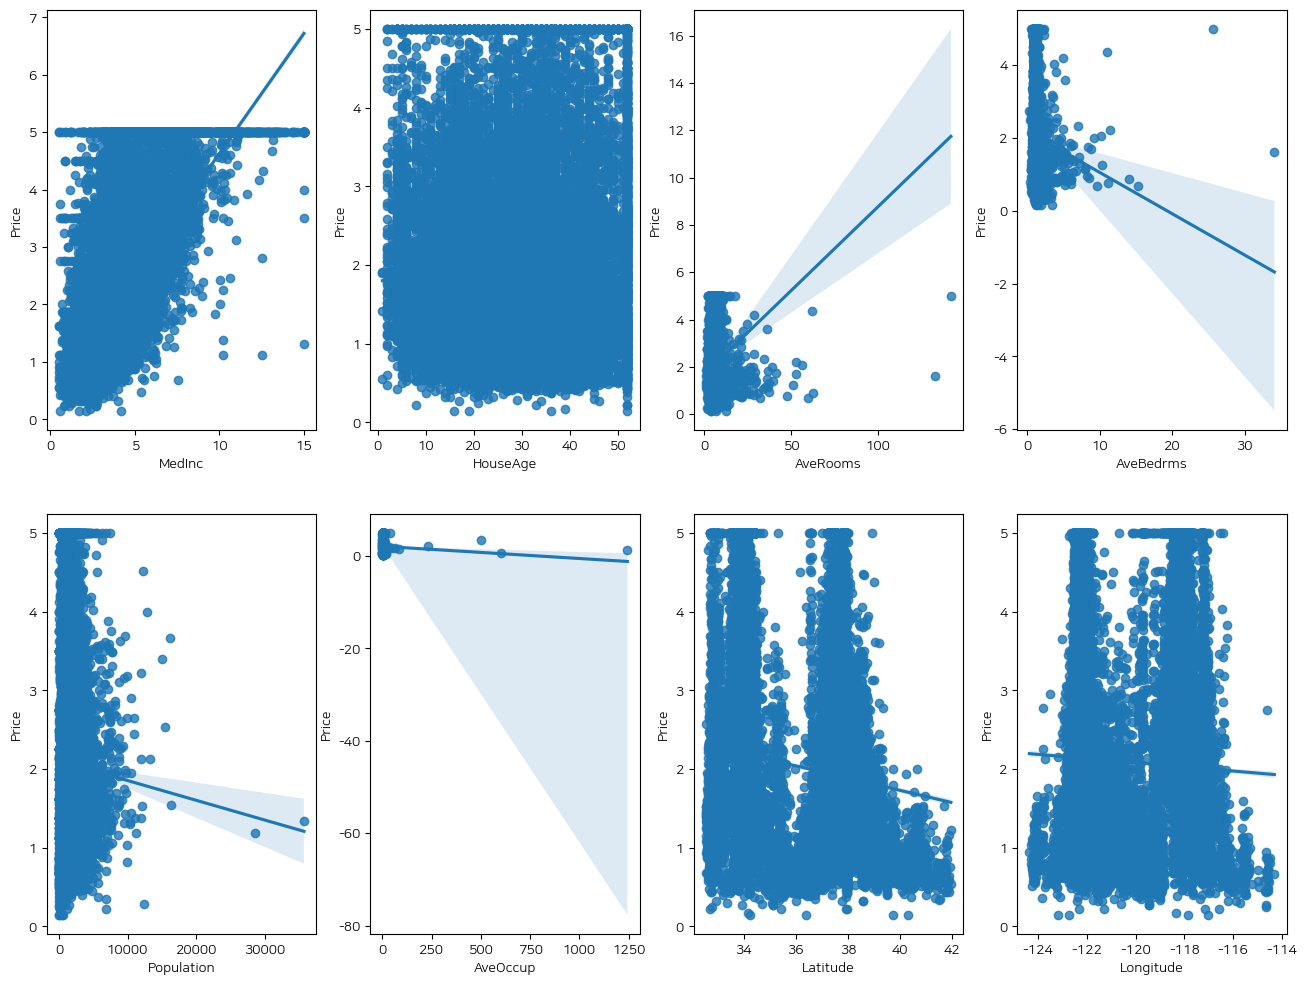

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# y 축은 가격으로 고정, x축은 각 feature 들이 순회하며 들어옴 

fig, axs = plt.subplots(figsize = (16, 12), nrows=2, ncols=4)

x_features = housing.feature_names

for i, feature in enumerate(x_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x = feature, y="Price", data=housing_df, ax=axs[row][col])

In [34]:
housing_df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000,-0.119,0.327,-0.062,0.005,0.019,-0.080,-0.015,0.688
HouseAge,-0.119,1.000,-0.153,-0.078,-0.296,0.013,0.011,-0.108,0.106
AveRooms,0.327,-0.153,1.000,0.848,-0.072,-0.005,0.106,-0.028,0.152
AveBedrms,-0.062,-0.078,0.848,1.000,-0.066,-0.006,0.070,0.013,-0.047
Population,0.005,-0.296,-0.072,-0.066,1.000,0.070,-0.109,0.100,-0.025
AveOccup,0.019,0.013,-0.005,-0.006,0.070,1.000,0.002,0.002,-0.024
Latitude,-0.080,0.011,0.106,0.070,-0.109,0.002,1.000,-0.925,-0.144
Longitude,-0.015,-0.108,-0.028,0.013,0.100,0.002,-0.925,1.000,-0.046
Price,0.688,0.106,0.152,-0.047,-0.025,-0.024,-0.144,-0.046,1.000


<AxesSubplot: xlabel='Longitude', ylabel='Latitude'>

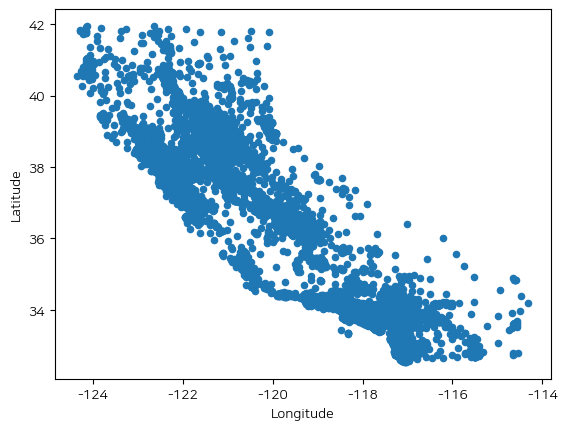

In [35]:
#판다스 데이터프레임으로 바로 쏠 수 있음 
#위경도 데이터 시각화 

housing_df.plot(kind='scatter', x = 'Longitude', y='Latitude')

<AxesSubplot: xlabel='Longitude', ylabel='Latitude'>

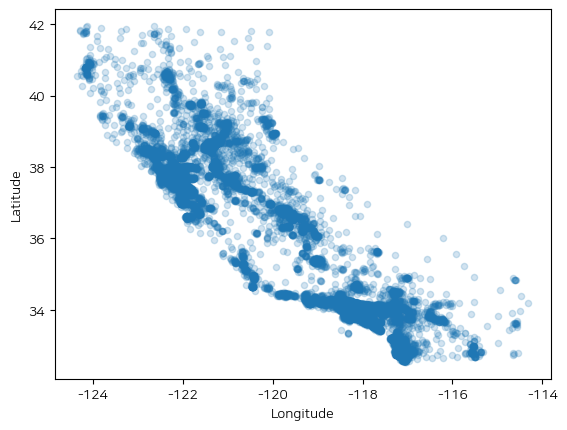

In [36]:
# 알파는 투명도임
housing_df.plot(kind='scatter', x = 'Longitude', y='Latitude', alpha=0.2)

<AxesSubplot: xlabel='Longitude', ylabel='Latitude'>

<Figure size 1000x1200 with 0 Axes>

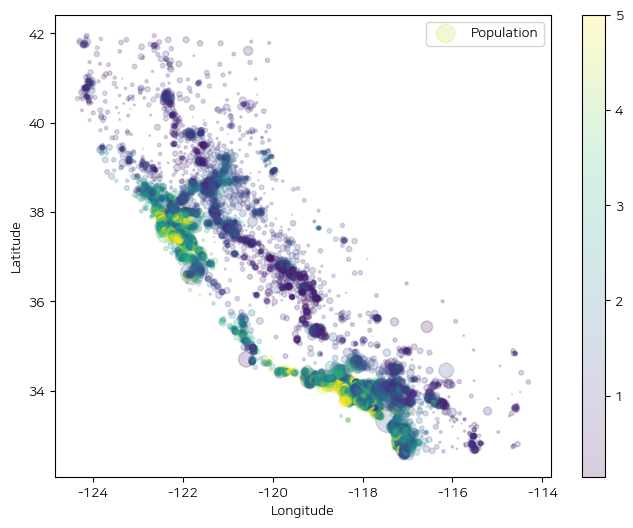

In [37]:
#위경도 정보에 따라 블록별로 산점도를 그리되 거주 인구수에 비례하게 점의 크기를 정하고, 주택 가격에 따라 점의 색깔을 다르게
plt.figure(figsize=(10,12))
housing_df.plot(kind='scatter', x = 'Longitude', y='Latitude', alpha=0.2, s = housing_df["Population"]/100,
                 c = housing_df["Price"], colormap=plt.get_cmap('viridis'), figsize=(8,6), 
                 label = 'Population')

<AxesSubplot: >

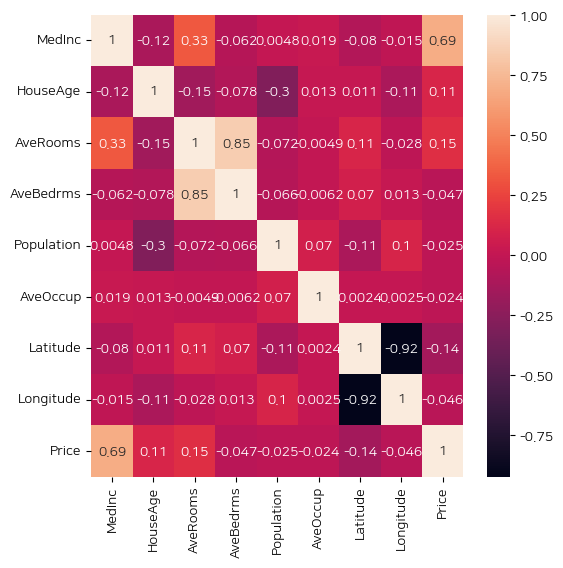

In [38]:
# 상관계수 히트맵

ccol = housing_df.columns

corr = housing_df[ccol].corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr, annot=True)

In [39]:
X=housing.data
y = housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

In [40]:

lr = LinearRegression()
reg = lr.fit(X_train, y_train)
coef = reg.coef_
intercept = reg.intercept_

In [41]:
y_pred = reg.predict(X_test)
eval_score(y_test, y_pred)

mse = 0.542
rmse = 0.736
r2 = 0.589


(0.5423293447570146, 0.7364301356931386, 0.5886851927020098)

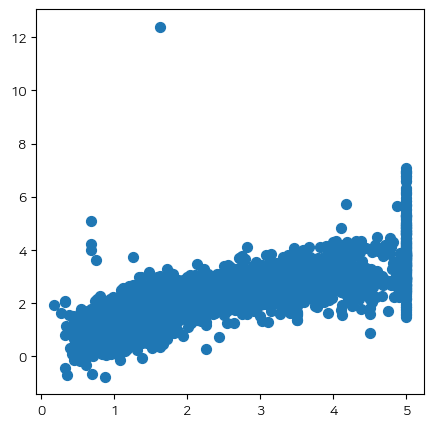

In [42]:
# 결과 시각화 

plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, s=50)

In [43]:
# 다른 모델을 생각해보자
# 버리거나 새로운 데이터를 수집 
# 특성 공학의 방법, 알고리즘 변경, 모델 변경 

In [44]:
#coef
print(coef)
coef = pd.Series(coef, index= housing.feature_names)
coef

[ 0.44  0.01 -0.12  0.8   0.   -0.   -0.42 -0.44]


MedInc        0.444
HouseAge      0.010
AveRooms     -0.120
AveBedrms     0.798
Population    0.000
AveOccup     -0.003
Latitude     -0.423
Longitude    -0.437
dtype: float64

---


# 선형 회귀식의 계수를 찾는 법 - OLS VS. SGD
- 보스턴 집값 데이터 활용(RM VS Price)

### 필요한 모듈 import

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 필요한 라이브러리 import 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [62]:
#데이터셋을 로드

from sklearn import datasets 
boston = datasets.fetch_openml('boston')

/Users/minholee/.pyenv/versions/3.9.4/lib/python3.9/site-packages/sklearn/datasets/_openml.py:292: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
/Users/minholee/.pyenv/versions/3.9.4/lib/python3.9/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [63]:
boston.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [64]:
X = np.array(boston.data.RM).reshape(-1,1)
y = boston.target

#데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

# 1. LinearRegression 모델을 사용한 경우

In [103]:
reg = LinearRegression()
reg.fit(X_train, y_train)
print(reg.coef_, reg.intercept_)

y_pred = reg.predict(X_test)
from eval_score_function import eval_score
eval_score(y_test, y_pred)


[8.46] -30.571032410898336
mse = 36.517
rmse = 6.043
r2 = 0.602


(36.517214730838624, 6.042947520112898, 0.6015774471545623)

# 2. SGDRegressor with hyperparameter

In [106]:
# default값을 정해주지 않고 돌아감

# 즉, max iter 1000, eta0 == 0.01, learning_rate = 'invscaling' invserse scaling
from sklearn.linear_model import SGDRegressor

reg = SGDRegressor(max_iter=1000, eta0=0.01, learning_rate='invscaling', loss='squared_error', random_state=42)
reg.fit(X_train, y_train)
print(reg.coef_[0], reg.intercept_[0]) # 둘 다 ndarray type임 

# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html



4.177239731696732 -3.5874778695577123


In [105]:
y_pred = reg.predict(X_test)
eval_score(y_test, y_pred)

mse = 55.130
rmse = 7.425
r2 = 0.399


(55.12954251421951, 7.424927104976823, 0.39850688976103077)

In [ ]:
# random state 가 달라서 매번 돌릴 때마다 다르게 나왔었는데, random state를 설정해주면 된다 
# 1000번 했을 떄 이렇게 나왔는데 
# 1000000돌려보자

In [107]:
reg = SGDRegressor(max_iter=1000, eta0=0.01, learning_rate='invscaling', loss='squared_error', random_state=42)
reg.fit(X_train, y_train)
print(reg.coef_[0], reg.intercept_[0]) # 둘 다 ndarray type임 

4.177239731696732 -3.5874778695577123


In [109]:
# 별 차이 없다! 그러면 학습률을 바꿔볼까?
reg = SGDRegressor(max_iter=1000000000, eta0=0.000001, learning_rate='invscaling', loss='squared_error', random_state=42)
reg.fit(X_train, y_train)
print(reg.coef_[0], reg.intercept_[0]) # 둘 다 ndarray type임 

3.298450778140954 0.49656585127760733


In [110]:
#쉽지 않다  하이퍼 파라미터에 의해 결과가 다르게 나오는 것을 알 수 있다

## class sklearn.linear_model.SGDRegressor 내용

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html

```py
class sklearn.linear_model.SGDRegressor
(loss='squared_error', *, penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, 
max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, random_state=None, 
learning_rate='invscaling', eta0=0.01, power_t=0.25, early_stopping=False, 
validation_fraction=0.1, n_iter_no_change=5, warm_start=False, average=False)
```
loss는 손실함수 mse(squared_error)쓰면 됨

참고할만한 블로그: https://suuntree.tistory.com/296



# 3. SGDRegressor with scaling

In [123]:
# 표준화 Standardization 스케일링을 통해 경사하강법 모델링

train_mean = np.mean(X_train, axis = 0 )
#표준편차 
train_std = np.std(X_train, axis=0)

test_mean = np.mean(X_test, axis = 0 )
test_std = np.std(X_test, axis = 0)


X_train_scaled = (X_train - train_mean)/train_std
X_test_scaled = (X_test-test_mean)/test_std
#평균이 0, 분산이 1인 array 생성


In [124]:
# X_train_scaled.sum()/len(X_train_scaled)


reg = SGDRegressor(max_iter=1000000, eta0=0.000001, learning_rate='invscaling', loss='squared_error', random_state=42)
# y는 스케일 하는 거 아님!!!!
reg.fit(X_train_scaled,y_train)
print(reg.coef_, reg.intercept_)
#평가지표
y_pred = reg.predict(X_test_scaled)
eval_score(y_test, y_pred)

[2.25] [8.6]
mse = 269.480
rmse = 16.416
r2 = -1.940


(269.4795565334565, 16.415832495900307, -1.9401676345004888)

# 4. SGDRegressor with StandardScaler()

In [122]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test) # 얘는 fit 하면 안됨 !!

array([[-0.44],
       [-0.42],
       [ 0.78],
       [ 0.49],
       [-3.89],
       [ 0.41],
       [-0.27],
       [ 0.55],
       [ 2.26],
       [ 3.65],
       [ 0.67],
       [-0.36],
       [-0.88],
       [-0.03],
       [ 0.38],
       [ 0.18],
       [-0.81],
       [ 0.07],
       [ 0.38],
       [-0.68],
       [-0.3 ],
       [ 1.19],
       [-0.78],
       [-0.01],
       [ 0.76],
       [-0.54],
       [ 1.79],
       [-0.53],
       [-0.13],
       [ 0.22],
       [ 0.58],
       [ 1.23],
       [-1.06],
       [-0.39],
       [-0.04],
       [ 2.08],
       [-0.47],
       [-0.55],
       [-0.53],
       [ 0.39],
       [-0.57],
       [ 1.53],
       [-0.32],
       [-0.25],
       [ 1.  ],
       [-0.41],
       [ 2.28],
       [-0.55],
       [-0.05],
       [-2.35],
       [ 0.18],
       [ 0.06],
       [-0.51],
       [ 0.61],
       [ 1.09],
       [-0.31],
       [ 0.1 ],
       [-0.54],
       [-0.57],
       [ 0.18],
       [ 0.7 ],
       [-0.23],
       [

# 파이프라인

Pipeline with StandardScaler, LinearRegression or SGDRegressor

하나의 하이퍼라인으로 묶은 것이 있는데 쓰면 좋다


In [125]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

reg = make_pipeline(StandardScaler(),
                    SGDRegressor(max_iter=1000000, eta0=0.01,\
                                 tol=0.0001, random_state=42, loss='squared_error'))
reg.fit(X_train, y_train)

# 계수 및 절편 확인: _속성은 학습을 통해 결정되는 속성
print(reg[1].coef_, reg[1].intercept_)

#회귀식 - pipeline()을 사용했기 때문에 SGDRegressor의 parameter가 reg객체의 1번 인덱스에 들어감
print("y = {:2f}X + {:.3f}".format(reg[1].coef_[0], reg[1].intercept_[0]))

# 예측 수행
y_pred = reg.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
# MSE, RMSE, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", np.round(mse, 3))
print("RMSE: ", np.round(rmse, 3))
print("R2: ", np.round(r2, 3))

[5.85] [22.32]
y = 5.847504X + 22.319
MSE: 36.523
RMSE:  6.043
R2:  0.602


# 다항회귀

## 다항식 특성으로 변환

In [136]:
# sampel [[0,1][2, 3]] 변환 연습
import numpy as np

X = np.array([[0,1],[2,3]]).reshape(2,2)

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)#2차
poly.fit(X)
poly.transform(X)


array([[ 1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.,  8., 12., 18., 27.]])

## 사이킷런으로 다항 회귀 분석

In [ ]:
#1) 데이터 준비: 데이터를 생성하여 탐색 및 확인

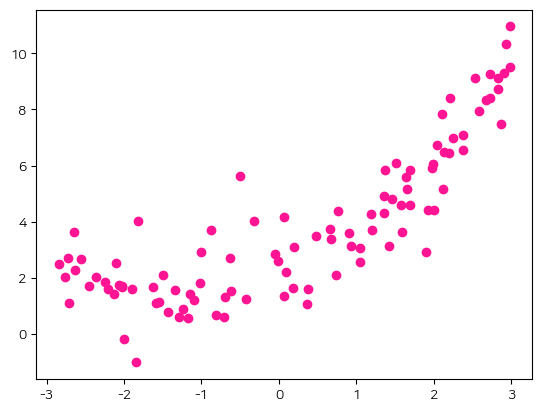

In [143]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(28)
X = 6 * np.random.rand(100,1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(100, 1) #randn은 정규 분포로 난수를 발생시켜준다는 소리, 즉 100개를 흔들어서 보여줘봐

plt.scatter(X, y, color='deeppink')
plt.show()

In [141]:
from sklearn.model_selection import train_test_split

xx = np.linspace(X.min()-0.1, X.max()+0.1).reshape(-1, 1) # default 50개임 

In [146]:
# 2) 단순 선형 회귀 분석 및 시각화 : 비교 목적
# 얘부터 먼저 할거임 
X_train
y_train
#원래 이런식으로 만들지만 
#다항회귀를 할 것이기 때문에 
len(X)
#걍 모양만 볼거라 테스트 트레인 안나눔
X1_train = X
y_train = y

In [147]:
from sklearn.linear_model import LinearRegression

X1_train = X
y_train = y

reg1 = LinearRegression()
reg1.fit(X1_train, y_train)
# 자 실행 전 예상해보자  xx의 집합을 reshape 하고 xx집합에 대해 yy는 reg1의 predict 를 해보는 거임
yy = reg1.predict(xx)

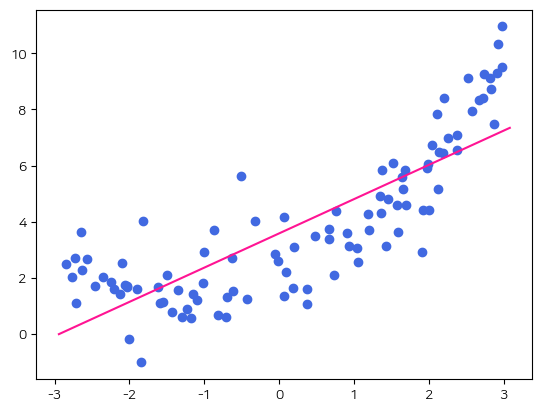

In [153]:
plt.plot(xx,yy, color = 'deeppink')
plt.scatter(X,y, c='royalblue')

In [ ]:
# 3) 2차항 형태로 다항 회귀 수행

In [161]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)#2차원으로 만들어줭
X2_train = poly.fit_transform(X)
X2_train# 이렇게 입력함수를 늘려서 준비를 해놓고 
y_train  = y

xx = np.arange(-3,3,0.01)
xx2 = xx.reshape(-1,1)

reg2 = LinearRegression()
reg2.fit(X2_train, y_train)
xx2 = poly.transform(xx)
yy = reg2.predict(xx2)


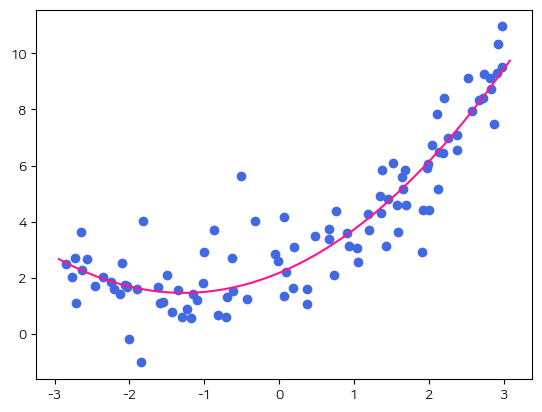

In [162]:
plt.plot(xx,yy, color = 'deeppink')
plt.scatter(X,y, c='royalblue')

In [164]:
# 구해진 2차식의 계수 확인
reg2.coef_, reg2.intercept_ # 1, x ,x^2 순인데 1 부분 저래 나오는 이유는 절편이기 때문!

(array([[0.  , 1.11, 0.44]]), array([2.17]))

In [179]:
# 4) 7차항 형태로 다항회귀 수행
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


X = 6 * np.random.rand(100,1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(100, 1) 


poly = PolynomialFeatures(degree=7)
reg7 = LinearRegression()

X7_train = poly.fit_transform(X)
y_train = y

reg7 = reg7.fit(X7_train, y_train)

xx7 = np.arange(-3,3 ,0.01).reshape(-1,1)
yy7 = reg7.predict(poly.transform(xx7))


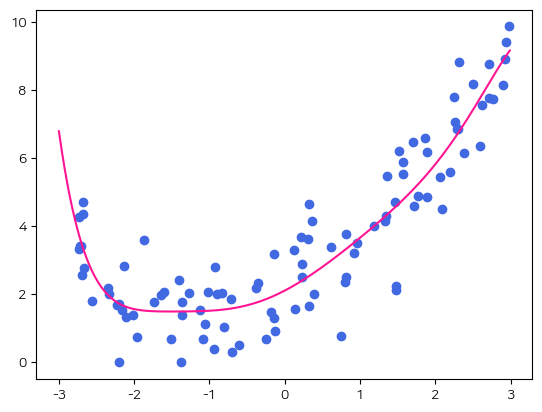

In [180]:
plt.plot(xx7,yy7, color = 'deeppink')
plt.scatter(X,y, c='royalblue')

In [181]:
# 4) 7차항 형태로 다항회귀 수행
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


X = 6 * np.random.rand(100,1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(100, 1) 


poly = PolynomialFeatures(degree=3)
reg3 = LinearRegression()

X3_train = poly.fit_transform(X)
y_train = y

reg3 = reg3.fit(X3_train, y_train)

xx3 = np.arange(-3,3 ,0.01).reshape(-1,1)
yy3 = reg3.predict(poly.transform(xx3))


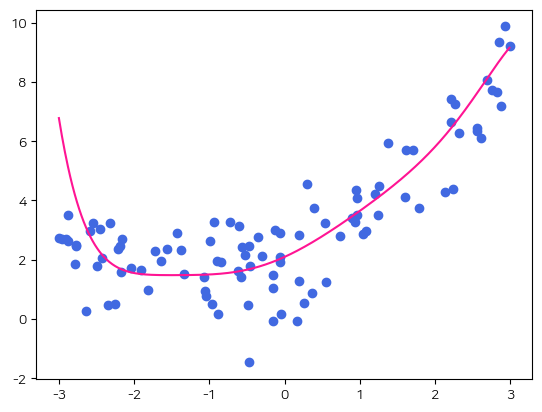

In [182]:
plt.plot(xx7,yy7, color = 'deeppink')
plt.scatter(X,y, c='royalblue')

뭐가 나은 모델인가?
그냥 봐선 몰?루 



In [ ]:
# 각 차수별 그래프와 원본 데이터 비교 시각화

# pipeline 응용

In [ ]:
# 데이터 변환과정과 머신러닝을 연결해줌

In [ ]:
# 1) degree=2인 모델
from sklearn.pipeline import make_pipeline

reg = make_pipeline(PolynomialFeatures(degree=2), LinearRegression()).fit(X, y)
xx = np.arange(-3, 3, 0.01)
yy = reg.predict(xx[:, np.newaxis])

plt.plot(xx, yy, color='r', linestyle='--', label='degree=2')
plt.scatter(X, y, color='b', alpha=0.2)
plt.legend()
plt.show()

In [ ]:
# 2) degree = [1, 3, 7]인 모델을 파이프라인으로 변환- 추정 통합

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

degree = [1, 3, 7]
colors = ['magenta', 'green', 'red']

plt.scatter(X, y, color='b', alpha=0.2)
for i, d in enumerate(degree): 
    reg = make_pipeline(PolynomialFeatures(degree=d), LinearRegression()).fit(X, y)
    xx = np.arange(-3, 3, 0.01)
    yy = reg.predict(xx[:, np.newaxis])

    plt.plot(xx, yy, color=colors[i], linestyle='--', label='degree={}'.format(d))
    plt.legend()
plt.show()  

In [ ]:
# 1, 2, 3, 7 나란히 그리기
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

degree = [1, 3, 7, 9]
colors = ['magenta', 'green', 'red', 'lime']


fig, ax = plt.subplots(2, 2, figsize=(16, 5))

for i, d in enumerate(degree): 
    #ax = fig.add_subplots(2, 2, i)
    
    reg = make_pipeline(PolynomialFeatures(degree=d), LinearRegression()).fit(X, y)
    xx = np.arange(-3, 3, 0.01)
    yy = reg.predict(xx[:, np.newaxis])
    ax[i].scatter(X, y, color='b', alpha=0.2)
    ax[i].plot(xx, yy, color=colors[i], linestyle='--', label='degree={}'.format(d))
    ax[i].legend()
plt.show()  

# pipeline 실습

In [ ]:
#################
##파이프라인 연습
####################
#다항식으로 데이터를 변환시키고 학습을 연결시키는 파이프라인 
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split
## 학습용, 검증용 데이터 분할

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
# 시각화를 위한 xx 좌표계 미리 준비
# y축 좌표계는 각 모델마다 만듦
#xx = np.linspace(X.min()-0.1, X.max()+0.1).reshape(-1, 1)
xx = np.arange(-3, 3, 0.01).reshape(-1, 1)
degree=[1, 3, 5, 10]

for d in degree:
    reg = make_pipeline(PolynomialFeatures(degree=d), LinearRegression())
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    yy = reg.predict(xx)
    r2 = r2_score(y_test, y_pred)
    plt.figure(figsize=(5,5))
    plt.plot(xx, yy, label='degree={}'.format(d))
    plt.scatter(X, y, s=5)
    plt.legend()
    
    # 주석 표시 - 텍스트
    plt.annotate('r2_score: {:.3f} '.format(r2),  #텍스트 입력
                 xycoords= 'axes pixels',
                 xy=(10, 230),            #텍스트 위치 기준점
                 )
    

# [실습 ]: 보스턴 집값 데이터셋을 활용한 다항회귀 실습 - 방의 갯수 VS 가격

### 필요한 모듈 import

In [ ]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

#### 데이터 수집

In [ ]:
boston = load_boston()

#### 데이터 이해

In [ ]:
#boston.DESCR
print(boston.feature_names)

#### 데이터 준비

In [ ]:
# 독립변수, 종속변수를 데이터프레임으로 정리

In [ ]:
boston.data

In [ ]:
np.set_printoptions(suppress=True)
boston.data[:5]

In [ ]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)['RM'].to_frame()
y = boston.target

In [ ]:
# 데이터프레임 확인
print(X)
print(X.values)

In [ ]:
# 학습용, 검증용 데이터 분할


#### 모델 구축

In [ ]:
# 시각화를 위한 xx 좌표계 미리 준비
# y축 좌표계는 각 모델마다 만듦
xx = np.linspace(X.min()-1, X.max()+1)  # 방의 갯수 최대값, 최소값

In [ ]:
# 2차식의 다항회귀


In [ ]:
# 3차식의 다항회귀


####  다항 회귀 시각화

#### 모델 성능 평가

In [ ]:
# 차수에 따른 r2(결정계수)를 시리즈로 만들어보자


#  당뇨병 데이터로 다항 회귀 실습

- hint:
- 1) 데이터셋:load_diabetes
- 2) 체질량지수(bmi)를 가지고 단순 선형회귀, 2차, 3차 다항회귀를 수행하고, 가장 적합한 모델을 찾으시오
- 3) 데이터 분할 비율: 0.3, random_state=1
- 4) 차수별 시각화
- 5) 차수별 결정계수 비교

In [ ]:
# 1) 데이터프레임으로 만들기


In [ ]:
# 선형 모델 객체 생성


In [ ]:
# 시각화를 위한 xx 좌표축 범위 확정



In [ ]:
# 차수별 모형 구축



In [ ]:
# 차수별 시각화

In [ ]:
# 차수에 따른 r2(결정계수)를 시리즈로 만들어보자


# 농어의 길이, 두께, 넓이 데이터를 활용하여 농어의 무게를 예측하는 선형회귀식을 완성하라


* 1) 데이터셋: 입력변수(perch_full.csv), 종속변수(perch_weight)
* 2) 단순선형회귀, 2차 다항회귀, 3차 다항회귀를 각각 수행하고, 가장 r2가 높은 모델을 찾으시오
* 3) 데이터 분할 비율: 0.2, random_state=22

In [ ]:
import pandas as pd
df = pd.read_csv('./data/perch_full.csv')
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
# X, y 데이터셋 준비

In [ ]:
#데이터 분할

In [ ]:
# 단순 선형회귀

In [ ]:
#2차 다항회귀

In [ ]:
# 2차 다항회귀를 파이프라인으로 구현

# 3차 다항회귀

# 5차 다항회귀

In [ ]:
# 5차 다항회귀 Pipeline with make_pipeline
from sklearn.pipeline import make_pipeline
reg5_mp = make_pipeline(PolynomialFeatures(degree=5), \
                      LinearRegression())
reg5_mp.fit(X_train, y_train)
y_pred5_mp = reg5_mp.predict(X_test)
print(reg5_mp[1].coef_, reg5_mp[1].intercept_)
r2_score(y_test, y_pred5_mp)
8:35
# 5차 다항회귀 with Pipeline
from sklearn.pipeline import Pipeline
reg5_p = Pipeline([('poly', PolynomialFeatures()), \
                    ('lr', LinearRegression())])
# parameter 설정, ('poly', PolynomialFeatures(degree=5)와 동일
reg5_p.set_params(poly__degree=5)
8:35
reg5_p.fit(X_train, y_train)
y_pred5_p = reg5_p.predict(X_test)
#print(reg5.coef_, reg5.intercept_)
r2_score(y_test, y_pred5_p)

############## 여기까지 ##############